# Classify brain tumor 2D scanned images into tumorus or healthy sample using ResNet50 Convolutional neural network architecture 

## Goal:
Our goal is to apply deep learning convolutional neural network alogirthm and build a model that allows us to classify brain tumor CT scanned images into healthy or tumorous sample.
The data is originally taken from kaggle website here:
https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

We use keras library and train the model using Sequential method.
The original images of brain are converted into a matrix data using function "ImageDataGenerator" defined in keras library.
We study the accuracy  at each epoch of the model training
In the end, we test the model againt known data and compute the confusion matrix to determine the validity of the model.


In [2]:
#Explore brain tumor image data using convolutional neural network
#Use TensorFlow, Keras library

In [3]:
#library for  Computer Vision
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2023-02-16 15:23:56.129564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Download the training data and test data from Kaggle
# Read this page to learn how to download data from Kaggle
# https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook
#Alternnatively, you can use the code below to directly download the data
#using your kaggle username and kaggle api key

import opendatasets as od
od.download("https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection")           
os.listdir('.')
os.listdir('brain-tumor-detection')

Skipping, found downloaded files in "./brain-tumor-detection" (use force=True to force download)


['pred', 'test', 'no', 'train', 'Br35H-Mask-RCNN', 'yes', 'validation']

In [6]:
#Create directory for train, test and validation data set
#NameType_of_data = "train", "test", "validation"
def CreateImageFolder(NameType_of_data,Percentage):
    ROOT_DIR='brain-tumor-detection'
    tumor_neg = os.listdir('brain-tumor-detection/no')
    tumor_pos = os.listdir('brain-tumor-detection/yes')
    ROOT_DIR2 = os.path.join(ROOT_DIR, NameType_of_data)
    if not os.path.exists(ROOT_DIR2):
        os.makedirs(os.path.join(ROOT_DIR2,"yes"))
        os.makedirs(os.path.join(ROOT_DIR2,"no"))
    else:
        print(NameType_of_data,"folder exist inside ", ROOT_DIR)
    
    print(len(tumor_pos))
    print(len(tumor_neg))
    #print(tumor_neg)
    #a=[4,10,3.3, 4,6]
    tumor_neg_cut = np.random.choice(tumor_neg,size=int(len(tumor_neg)*Percentage/100), replace=False)
    tumor_pos_cut = np.random.choice(tumor_pos,size=int(len(tumor_pos)*Percentage/100), replace=False)

    print(len(tumor_pos_cut))
    print(len(tumor_neg_cut))
    for file in tumor_pos_cut:
        File1=ROOT_DIR + "/yes/" + file
        File2=ROOT_DIR + "/" + NameType_of_data +"/yes/" + file
        shutil.copy(File1, File2)

    for file in tumor_neg_cut:
        File1=ROOT_DIR + "/no/" + file
        File2=ROOT_DIR + "/" + NameType_of_data + "/no/" + file
        shutil.copy(File1, File2)
  
    mylist = os.listdir(os.path.join(ROOT_DIR2,"yes"))
    print(mylist[0:5])
    mylist = os.listdir(os.path.join(ROOT_DIR2,"no"))
    print(mylist[0:5])

In [7]:
#Collect all the positive and negative tumor detection images
# 1500 images with brain tumor and another 1500 images without brain tumor
#Create directory for train, test and validation data set
#NameType_of_data = "train", "test", "validation"
CreateImageFolder("train",70)

train folder exist inside  brain-tumor-detection
1500
1500
1050
1050
['y369.jpg', 'y1343.jpg', 'y1425.jpg', 'y1431.jpg', 'y1357.jpg']
['no1157.jpg', 'no132.jpg', 'no654.jpg', 'no640.jpg', 'no898.jpg']


In [8]:
CreateImageFolder("test",100)


test folder exist inside  brain-tumor-detection
1500
1500
1500
1500
['y369.jpg', 'y1343.jpg', 'y1425.jpg', 'y1431.jpg', 'y1357.jpg']
['no1157.jpg', 'no132.jpg', 'no654.jpg', 'no640.jpg', 'no898.jpg']


In [9]:
CreateImageFolder("validation",20)

validation folder exist inside  brain-tumor-detection
1500
1500
300
300
['y1343.jpg', 'y1425.jpg', 'y1357.jpg', 'y433.jpg', 'y341.jpg']
['no132.jpg', 'no654.jpg', 'no640.jpg', 'no126.jpg', 'no668.jpg']


In [10]:
#Building model
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from keras.layers import GlobalAvgPool2D, GlobalMaxPool2D
#from keras.models import Sequential
#from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
#from keras_preprocessing.image import load_img

from keras.applications import ResNet50
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator


In [11]:
#CNN model
#mymodel = Sequential()
mymodel = Sequential( [ ResNet50(input_shape=(224,224,3), include_top=False),])

#for layer in mymodel.layers:
#  layer.trainable = False

#mymodel.add(Conv2D(64, (3,3), activation='relu'))
#mymodel.add(MaxPool2D(2,2))
mymodel.add(GlobalAvgPool2D() )
#mymodel.add(Flatten())
mymodel.add(Dense(64, activation='relu'))
mymodel.add(Dropout(0.4))
mymodel.add(Dense(1, activation='softmax'))

mymodel.summary()
          

2023-02-16 15:24:36.951736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23,718,913
Trainable params: 23,665,793
Non-trainable params: 53,120
_______________________________________

In [12]:
mymodel.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])


In [13]:
#Preprocess the jpeg image and convert into image data
#Takes the path to a directory & generates batches of augmented data.


def preprocessingImages(path):
    """
    Input : path of image
    Output: pre processed images
    """
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')
    
    return image

    
def preprocessingImagesTest(path):
    """
    Input : path of image
    Output: pre processed images
    """
    image_data = ImageDataGenerator( rescale=1/255, )
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')
    
    return image    
    
    

In [14]:
train_data = preprocessingImages('brain-tumor-detection/train')


Found 2977 images belonging to 2 classes.


In [15]:
test_data = preprocessingImagesTest('brain-tumor-detection/test')


Found 3000 images belonging to 2 classes.


In [16]:
val_data = preprocessingImagesTest('brain-tumor-detection/validation')
print(val_data.class_indices)
print(val_data)

Found 1997 images belonging to 2 classes.
{'no': 0, 'yes': 1}


In [20]:
#Early stopping and model checl point 
#Stop training the model when a monitored metric has stopped improving
#Assuing the goal of a training is to minimize the loss. With this, the metric to be
# monitored would be "loss", and mode would be "min". A model.fit() training loop will check at end of every epoch
# whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found to 
# be no longer decreasing, model.stop_training is marked True and the training terminates.
#
from keras.callbacks import ModelCheckpoint, EarlyStopping
#early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode="auto")
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose=1, save_best_only=True, mode="auto")
callb=[es,mc]


In [21]:
#model training

#modelfit = mymodel.fit_generator(generator=train_data, steps_per_epoch=8, 
                           #   epochs=30, verbose=1, validation_data=val_data, validation_steps=16,
                           #  callbacks=callb)

modelfit = mymodel.fit_generator(generator=train_data, steps_per_epoch=8,
                              epochs=30, verbose=1, validation_data=val_data, validation_steps=16,
                                 callbacks=callb
                             )


/var/folders/0_/s4qq72292hz9nrxssxh6fp140000gn/T/ipykernel_71854/2370694413.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  modelfit = mymodel.fit_generator(generator=train_data, steps_per_epoch=8,


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.3963 - accuracy: 0.4756 
Epoch 1: val_accuracy improved from -inf to 0.49023, saving model to ./bestmodel.h5
8/8 [==============================] - 159s 23s/step - loss: 0.3963 - accuracy: 0.4756 - val_loss: 6445.3848 - val_accuracy: 0.4902
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.5303 - accuracy: 0.4844 
Epoch 2: val_accuracy did not improve from 0.49023
8/8 [==============================] - 155s 19s/step - loss: 0.5303 - accuracy: 0.4844 - val_loss: 986.8638 - val_accuracy: 0.4863
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.5704 - accuracy: 0.4978 
Epoch 3: val_accuracy did not improve from 0.49023
8/8 [==============================] - 133s 17s/step - loss: 0.5704 - accuracy: 0.4978 - val_loss: 2168.2351 - val_accuracy: 0.4863
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5117 
Epoch 4: val_accuracy improved from 0.49023 to 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


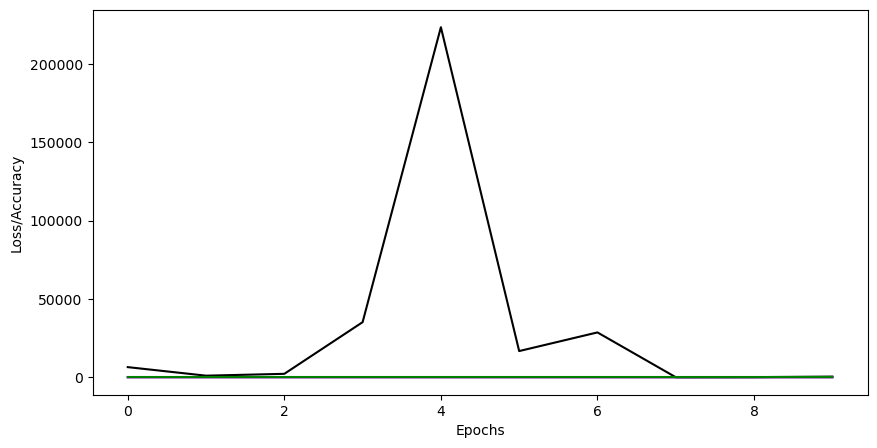

In [22]:
#Visualization of the model accuracy
h = modelfit.history
print(h.keys())

fig, ax = plt.subplots(1,1, figsize= (10,5))

ax.plot(h['loss'],color='red')
ax.plot(h['accuracy'],color='blue')
ax.plot(h['val_loss'],color='black')
ax.plot(h['val_accuracy'],color='green')

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss/Accuracy')

plt.show()


In [23]:
#Load the model for analysis
from keras.models import load_model
mymodel.save('bestmodel.h5')
mymodel2 = load_model("bestmodel.h5")


In [24]:
#Model accuracy against test data
result = mymodel2.evaluate_generator(test_data)

print(test_data)

/var/folders/0_/s4qq72292hz9nrxssxh6fp140000gn/T/ipykernel_71854/3503831211.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result = mymodel2.evaluate_generator(test_data)


In [25]:
##Model accuracy against test data
print(result)
print(mymodel2.metrics_names)
print("accuracy of our model =", result[1])

[382.69134521484375, 0.5]
['loss', 'accuracy']
accuracy of our model = 0.5


1/1 [==============================] - 1s 881ms/step
Tumor status prediction = yes
Passed the test
1/1 [==============================] - 0s 109ms/step
Tumor status prediction = yes
Failed the test
1/1 [==============================] - 0s 113ms/step
Tumor status prediction = yes
Passed the test
1/1 [==============================] - 0s 118ms/step
Tumor status prediction = yes
Failed the test
1/1 [==============================] - 0s 118ms/step
Tumor status prediction = yes
Passed the test
1/1 [==============================] - 0s 118ms/step
Tumor status prediction = yes
Passed the test
1/1 [==============================] - 0s 109ms/step
Tumor status prediction = yes
Passed the test
1/1 [==============================] - 0s 114ms/step
Tumor status prediction = yes
Passed the test
1/1 [==============================] - 0s 113ms/step
Tumor status prediction = yes
Passed the test
1/1 [==============================] - 0s 119ms/step
Tumor status prediction = yes
Passed the test
1/1 [=====

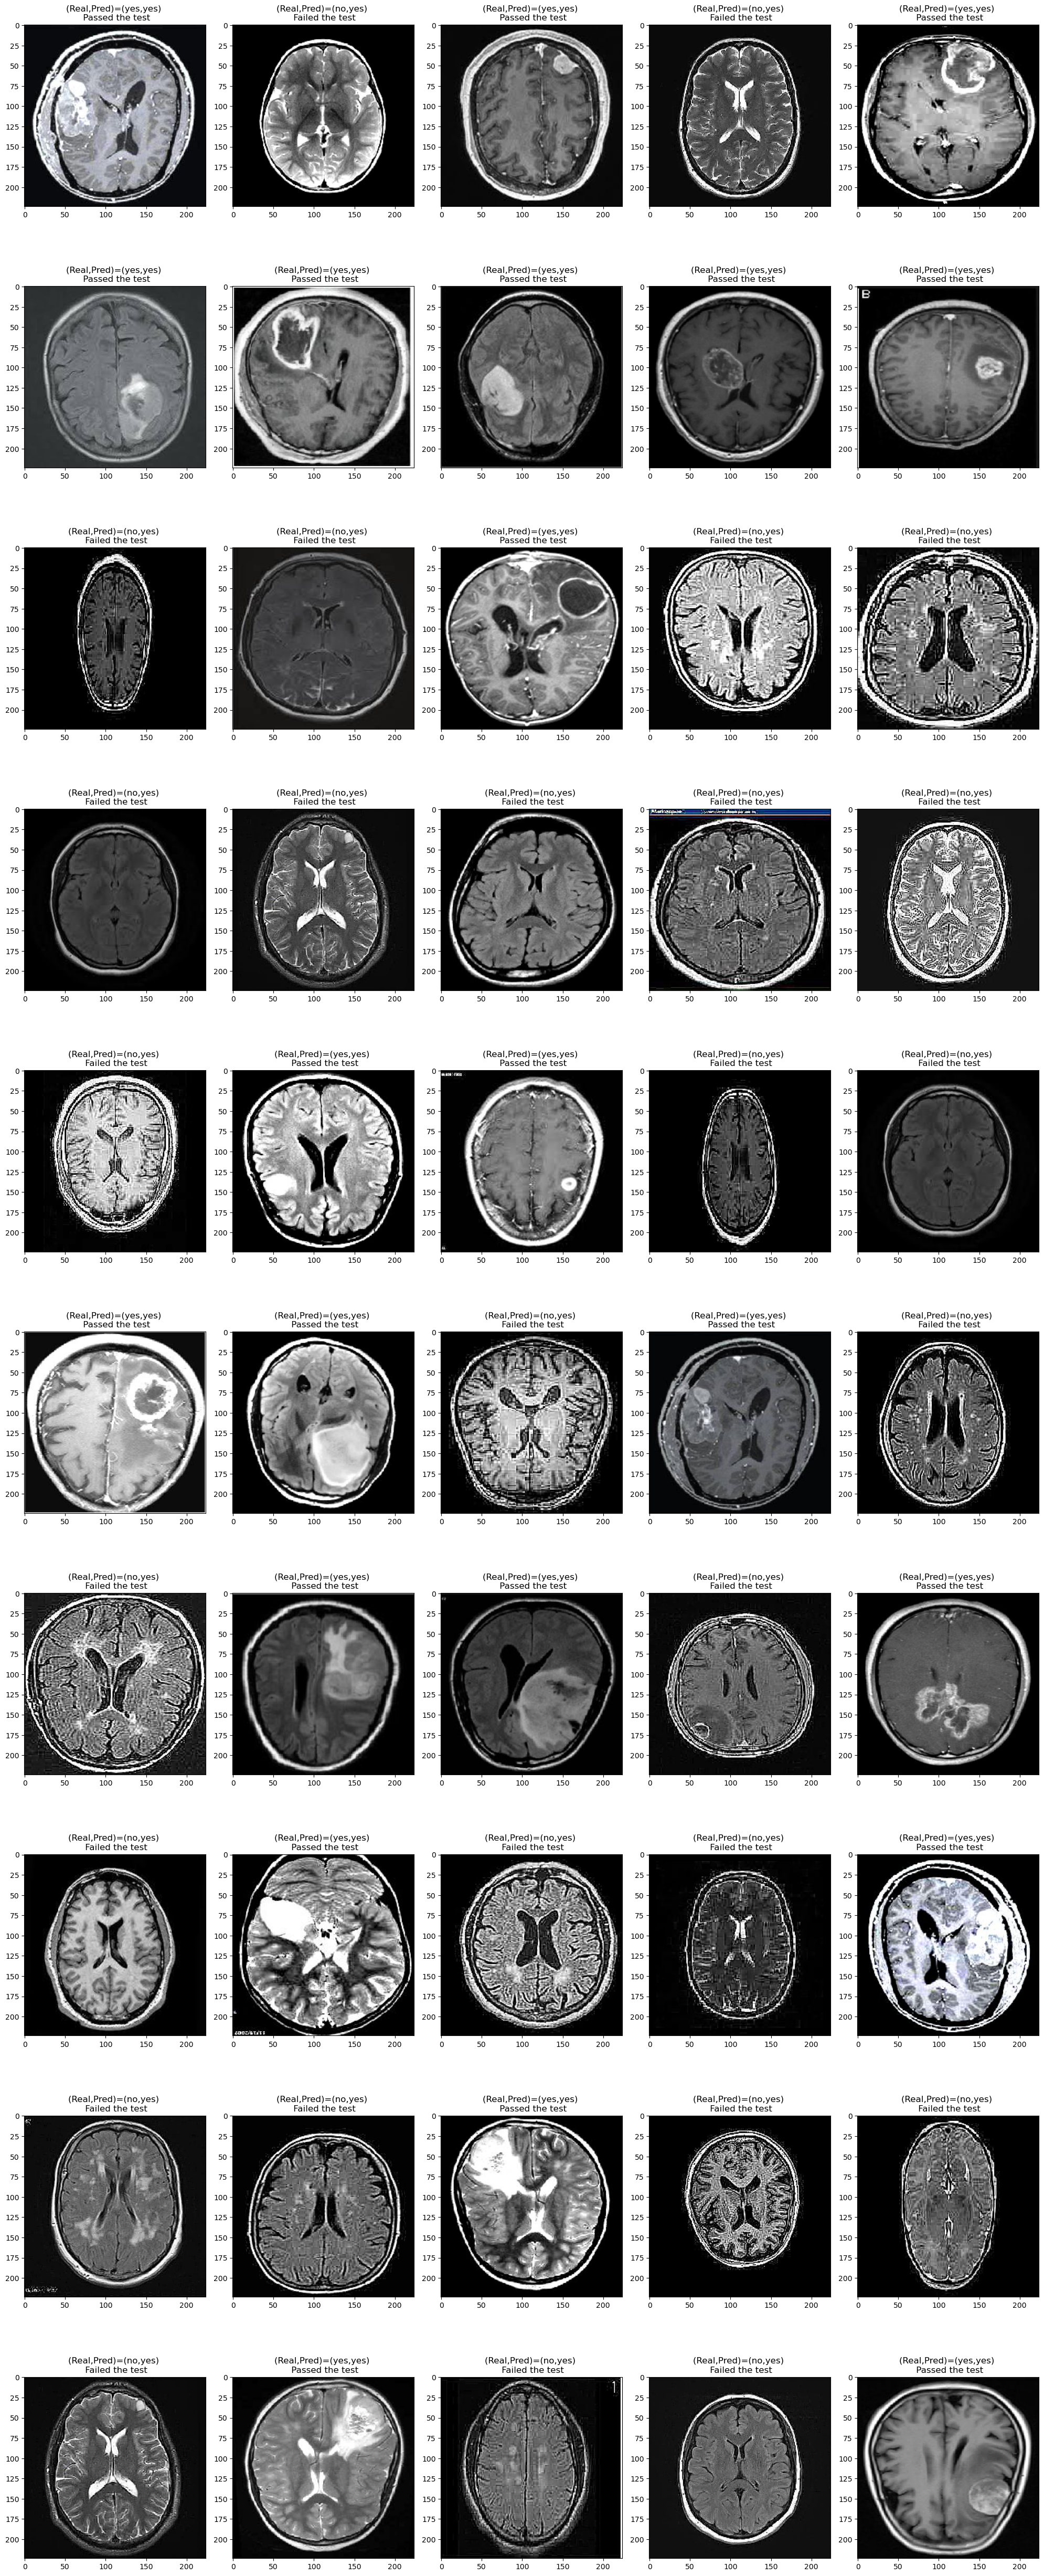

[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [26]:
#test the brain tumor images
import random

ROOT_DIR='brain-tumor-detection'
fig, ax = plt.subplots(10,5,figsize=(20,50))
y_test=[]
y_predict=[]

for i in range(50):
    imagetype = np.random.choice(["yes","no"],size=1)
    if imagetype=="yes":
        path_of_image = ROOT_DIR + "/yes/y" + str(int(random.random()*200))  +".jpg"
    else:
        path_of_image = ROOT_DIR + "/no/no" + str(int(random.random()*200))  +".jpg"

    img = load_img(path_of_image, target_size=(224,224) )
    input_data = img_to_array(img)/255
    
    ax.flat[i].imshow(input_data)
  
    #print(input_data.shape)
    
    input_data = np.expand_dims(input_data,axis=0)
    #print(input_data.shape)
    prob = mymodel.predict(input_data)
    #print(prob)
    #print(path_of_image)
    
    if prob > 0.5:
        print("Tumor status prediction = yes")
        if imagetype=="yes":
            print("Passed the test")
            titleS="(Real,Pred)=(yes,yes) \n Passed the test"
            y_test.append(1)
            y_predict.append(1)
        else: 
            print("Failed the test")
            titleS="(Real,Pred)=(no,yes) \n Failed the test"
            y_test.append(0)
            y_predict.append(1)
    else:
        print("Tumor status prediction = no")
        if imagetype=="yes":
            print("Failed the test")
            titleS="(Real,Pred)=(yes,no) \n Failed the test"
            y_test.append(1)
            y_predict.append(0)
        else: 
            print("Passed the test")
            titleS="(Real,Pred)=(no,no) \n Passed the test"
            y_test.append(0)
            y_predict.append(0)
    ax.flat[i].set_title(titleS)

fig.tight_layout()                
plt.show() 
print(y_test,y_predict)

In [27]:
#Classification report, confusion matrix
#define a function to plot 2x2 confusion matrix
def plot_confusion_matrix(cnf_mat, LabelS, cmap=plt.cm.Blues):
    plt.imshow(cnf_mat, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(LabelS))
    plt.xticks(tick_marks, LabelS, rotation=45)
    plt.yticks(tick_marks, LabelS)
    for i  in range(0,2):
        for j in range(0,2):
            plt.text(i,j,cnf_mat[i][j])

#Retrive classification report and consfusion matrix
from sklearn.metrics import classification_report, confusion_matrix
def EvaluateModel(y_test, y_predict):
    print( classification_report(y_test, y_predict) )
    cnf_mat = confusion_matrix(y_test, y_predict, labels=[0,1])
    print(cnf_mat)
    plot_confusion_matrix(cnf_mat, LabelS=['Benign(0)','Malignant(1)'])

[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.44      1.00      0.61        22

    accuracy                           0.44        50
   macro avg       0.22      0.50      0.31        50
weighted avg       0.19      0.44      0.27        50

[[ 0 28]
 [ 0 22]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


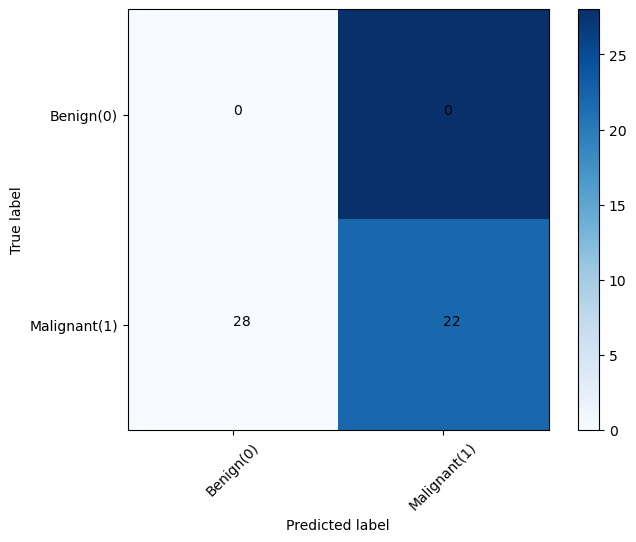

In [28]:
# Plotting confusion matrix
print(y_test,y_predict)
EvaluateModel(y_test, y_predict) 


### Resnet50 CNN architecture seems to perform worse compared to custom build  CNN layers.
### To see the performance of our custom CNN architecture open the python notebook code "main_cnn.ipynb"